# Project Proposal

## Gender's relation to proportion of Gymnastics Medals in Olympic

## Introduction

For this project we will be using “120 years of Olympic history: athletes and results” data set found on Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 
The original data set was scraped from https://www.sports-reference.com/. Forman, S. (2000). Sports reference . Sports stats, fast, easy, and up-to-date. Retrieved November 4, 2022, from https://www.sports-reference.com/ 

The data set contains 271116 rows that correspond to individual athletes that have competed in an Olympic event and 15 columns (ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal). 

For our research question, we will be investigating the how Gender affects the proportion of people ages 20-30 who won an Olympic medal in gymnastics from the year 1912 and onwards. BMI is used to categorize individuals as underweight (BMI <18.5), normal weight (BMI= 18.5–24.9), overweight (BMI= 25–29.9) or obese (BMI >30), based on the parameters weight and height. Previous research shows that lower BMI was related with better performance but was negatively affected once BMI became very low. Further studies show that smaller gymnists with high strength to mass ratios have greater potential for performing skills involving whole-body rotations. 

## Prelimenary Results

We have first downloaded the data set from Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results .

Here, we load all the libraries that we might need to clean, wrangle and visualise the data.

In [73]:
library(cowplot)
library(datateachr)
library(dplyr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
options(repr.matrix.max.rows = 6)

We used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [3]:
olympic_data <- read_csv("athlete_events.csv")
head(olympic_data)

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


For our inferential study we are going to look at the data from the year 1912 and onwards.

Since, we only want to assess the proportion of Gymnasts who won a medal in the Olympics in the event Gymnastics Men's/Women's Individual All-Around, we are going to filter the data so we only have the Gymnastics data. Furthermore, we are only selecting the columns we require for our study.

In [38]:
gymnast_data <- olympic_data |> 
                        filter(Year >= 1912) |> 
                        filter(!is.na(Age)) |>
                        filter(Sport == "Gymnastics" & (Event == "Gymnastics Men's Individual All-Around" | Event == "Gymnastics Women's Individual All-Around")) |>
                        select(Sex , Age, Medal)
nrow(gymnast_data)
head(gymnast_data)

[1] 3579

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,28,Bronze
M,32,NA
M,23,NA
M,19,NA
M,22,NA
F,19,NA


We know that, Individuals are drawn without replacement from the population, so independence can never be achieved. Since, our population size is 3579, it is safe to take a sample of size 350 for our inferential study upon the assumption that the samples taken are independent of each other, since, we are taking the sample size to be < 10% of the population size.

In [53]:
set.seed(4)

gymnast_sample <- gymnast_data |> 
                  sample_n(size = 350)

head(gymnast_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,21,NA
F,31,NA
M,27,NA
M,21,NA
M,24,NA
M,19,NA


In [95]:
options(repr.matrix.max.rows = 10)
gymnast_sample_grouped <- gymnast_sample |> 
                        group_by(Sex , Medal) |>
                        summarise(mean_Age = mean(Age) , sd_Age = sd(Age))


gymnast_sample_grouped

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Sex,Medal,mean_Age,sd_Age
<chr>,<chr>,<dbl>,<dbl>
F,Bronze,17.50000,2.121320
F,Gold,22.33333,3.511885
F,Silver,24.50000,9.192388
F,NA,19.24060,3.921870
M,Bronze,26.00000,2.828427
M,Gold,22.00000,1.414214
M,Silver,29.00000,4.358899
M,NA,24.60099,3.814174


In [103]:
female_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age, sd_age = sd_Age) |>
                    select(-mean_Age , -sd_Age)
male_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age , sd_age = sd_Age)|>
                    select(-mean_Age , -sd_Age)
female_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age)) |>
                    mutate(Medal = "Yes")
male_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age))|>
                    mutate(Medal = "Yes")

gymnast_sample_final <- rbind(female_no_medal , male_no_medal , female_medal , male_medal)

gymnast_sample_final

Sex,Medal,mean_age,sd_age
<chr>,<chr>,<dbl>,<dbl>
F,No,19.24060,3.921870
M,No,24.60099,3.814174
F,Yes,21.44444,4.941864
M,Yes,25.66667,2.867180


### Visualization

Since, we have 2 categorical variables, for visualisation we can use Bar Graph or a contingency table. 

Sex,Bronze,Gold,Silver,<NA>
<chr>,<int>,<int>,<int>,<int>
F,2,3,2,133
M,2,2,3,203


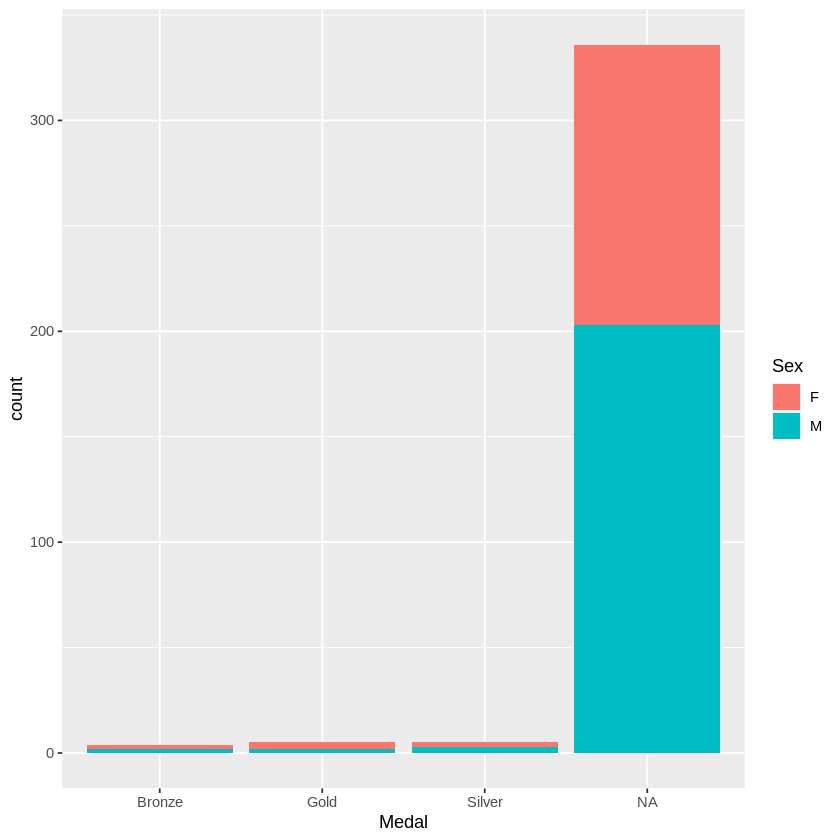

In [96]:
contingency_table <- gymnast_sample |> 
                    group_by(Sex, Medal) |> 
                    tally() |>
                    spread(Medal, n)

bar_graph <- gymnast_sample |>
             ggplot(aes(x = Medal , fill = Sex)) +
             geom_bar(stat = "count")

bar_graph
contingency_table

## Methods : Plan

## References

(Sherman, Robert Trattner; Thompson, Ron A; Rose, Jennifer S. ) Body mass index and athletic performance in elite female gymnasts,
Journal of Sport Behavior; Mobile Vol. 19, Iss. 4,  (Dec 1996): 338.

https://www.proquest.com/openview/af45415483fdf49d1e797ded686c20a0/1?pq-origsite=gscholar&cbl=30153 

Ackland, T., Elliott, B., & Richards, J. (2003). Gymnastics. Sports Biomechanics, 2(2), 163–176. https://doi.org/10.1080/14763140308522815